# Instagram Project

### Analysis for Instagram Data project
- in this Project, I will work on Instagram Dataset which has some Instagram properties

### Instagram Dataset Field Description
- Below is description of some properties in the dataset

#### Core Fields
- **Impressions** : Numeric value that represents the number of impressions for each post

### Questions to be answered in the dataset
1. Which posts received the most likes?
2. Which posts received the most saves and shares?
3. Which posts generated the most profile visits and follows?
4. What is the correlation between likes and other metrics(impressions, saves, comments, follows)?
5. Do posts with higher impressions always get more likes?
6. Do more profile visits translate into more follows?
7. Which source (From Home, From Hashtags, From Explore, From Other) contributes the most impressions overall?
8. For each post, which source ratio is the highest?
9. Do posts with higher Explore_ratio receive more likes?
10. Do posts with higher Hashtag_ratio perform better than those with lower?
11. Which posts have the highest engagement rate?
12. Do posts with more saves also receive more likes?
13. What is the save-to-like ratio across posts? Which posts are most valuable?
14. Do more shares lead to more profile visits and follows?
15. Does caption length (short vs long) affect likes?
16. Does impressions affect engagement rate?
17. Can we predict likes based on impressions, saves, shares, profile visits?

In [1]:
# load needed Modules
import pandas as pd
# load dataset into a dataframe
df = pd.read_csv('Instagram data.csv',encoding = 'latin1')

In [2]:
# display first rows
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# check for dataframe shape
df.shape

(119, 13)

- We found data has 113 posts(rows) with 13 features(columns)

In [4]:
# check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
# list all data columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [6]:
# copy dataframe
df_copy =  df.copy()

##### Feature Engineering
- add column engagement rate to know how much people interact with a post relative to how many saw it.
- add column caption length to know if longer or shorter caption get more likes
- add column saves_to_like ratio to know save ratio
- add column source ratios for(explore, home, hashtag, other) to know how much each of them within whole post
- add column postId to be able to make unique number for each post

In [7]:
# check for duplicates
df.duplicated().sum()

np.int64(17)

- there is 17 duplicated rows

In [8]:
# drop_duplicates
df.drop_duplicates(inplace = True)
# check
df.duplicated().sum()

np.int64(0)

In [9]:
# check null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
df["Engagement_Rate"] = ((df["Likes"] + df["Comments"] + df["Shares"] + df["Saves"]) / df["Impressions"]) * 100
df["Home_ratio"] = (df["From Home"] / df["Impressions"]) * 10
df["Explore_ratio"] = (df["From Explore"] / df["Impressions"]) * 10
df["Hashtag_ratio"] = (df["From Hashtags"] / df["Impressions"]) * 10
df["Other_ratio"] = (df["From Other"] / df["Impressions"]) * 10
df['saves_to_likes'] = (df['Saves'] / df['Likes']) * 10
df.insert(0,'Post_ID' ,range(1,len(df)+1))

In [11]:
df['Caption_Length'] = df['Caption'].apply(len)

In [12]:
df.head()

,Post_ID,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,...,Follows,Caption,Hashtags,Engagement_Rate,Home_ratio,Explore_ratio,Hashtag_ratio,Other_ratio,saves_to_likes,Caption_Length
0,1,3920,2586,1028,619,56,98,9,5,162,...,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,6.989796,6.596939,1.579082,2.622449,0.142857,6.049383,112
1,2,5394,2727,1838,1174,78,194,7,14,224,...,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,8.138673,5.055617,2.176492,3.407490,0.144605,8.660714,187
2,3,4021,2085,1188,0,533,41,11,1,131,...,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,4.575976,5.185277,0.000000,2.954489,1.325541,3.129771,117
3,4,4528,2700,621,932,73,172,10,7,213,...,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,8.878092,5.962898,2.058304,1.371466,0.161219,8.075117,202
4,5,2518,1704,255,279,37,96,5,4,123,...,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,9.054805,6.767276,1.108022,1.012708,0.146942,7.804878,178


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##### Q1: Which posts received the most likes?

In [14]:
df[df['Likes'] == df['Likes'].max()][['Post_ID','Caption']]

,Post_ID,Caption
117,101,Here are some of the best data science certifi...


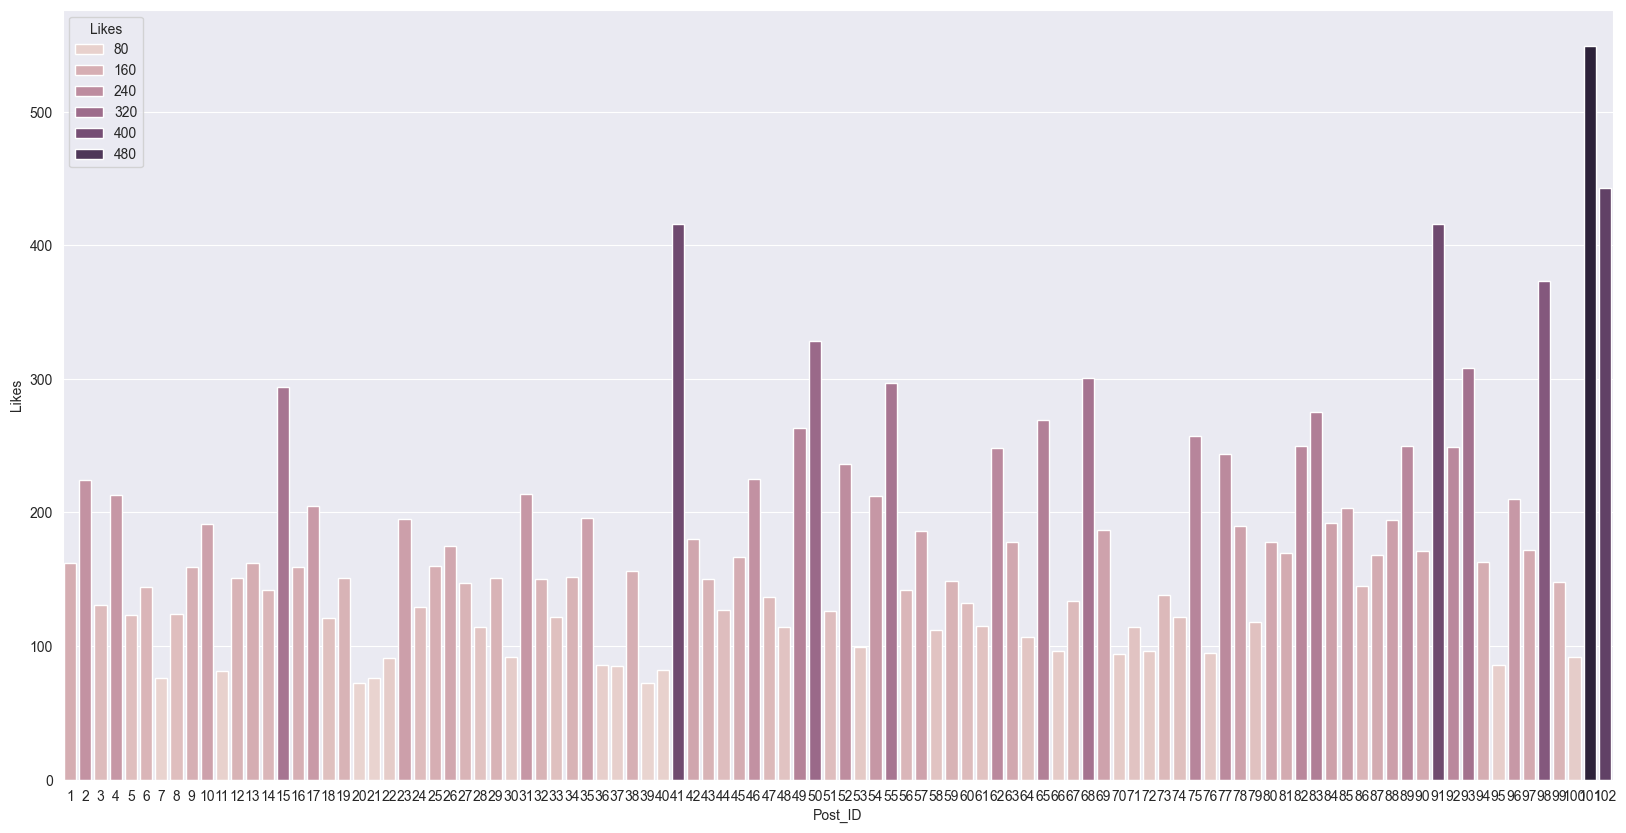

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='Post_ID', y='Likes', hue='Likes', data=df)

plt.show()

##### Q2: Which posts received the most saves and shares?

In [16]:
df[df['Saves'] == df['Saves'].max()][['Post_ID','Caption']]

,Post_ID,Caption
117,101,Here are some of the best data science certifi...


In [17]:
df[df['Shares'] == df['Shares'].max()][['Post_ID','Caption']]

,Post_ID,Caption
117,101,Here are some of the best data science certifi...


##### Q3: Which posts generated the most profile visits and follows?

In [18]:
df[df['Profile Visits'] == df['Profile Visits'].max()][['Post_ID','Caption']]

,Post_ID,Caption
118,102,175 Python Projects with Source Code solved an...


In [19]:
df[df['Follows'] == df['Follows'].max()][['Post_ID','Caption']]

,Post_ID,Caption
107,91,Here is a list of 100+ Machine Learning Algori...


In [20]:
df.columns

Index(['Post_ID', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement_Rate', 'Home_ratio',
       'Explore_ratio', 'Hashtag_ratio', 'Other_ratio', 'saves_to_likes',
       'Caption_Length'],
      dtype='object')

##### Q4: What is the correlation between likes and other metrics(impressions, saves, comments, follows)?

In [21]:
df[['Likes','Impressions','Saves','Comments','Follows']].corr()

,Likes,Impressions,Saves,Comments,Follows
Likes,1.000000,0.852952,0.843395,0.163383,0.758234
Impressions,0.852952,1.000000,0.791448,-0.008535,0.889944
Saves,0.843395,0.791448,1.000000,-0.003695,0.647585
Comments,0.163383,-0.008535,-0.003695,1.000000,-0.029298
Follows,0.758234,0.889944,0.647585,-0.029298,1.000000


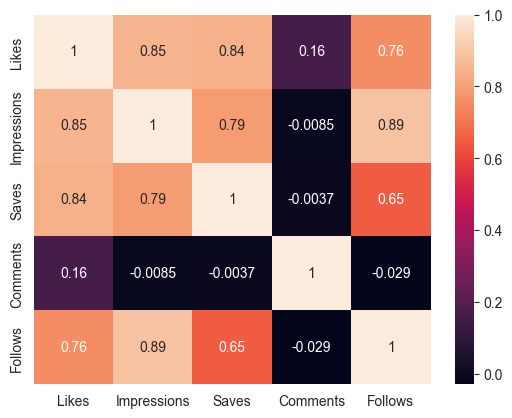

In [63]:
sns.heatmap(df[['Likes','Impressions','Saves','Comments','Follows']].corr(),annot=True)
plt.show()

##### Q5: Do posts with higher impressions always get more likes?

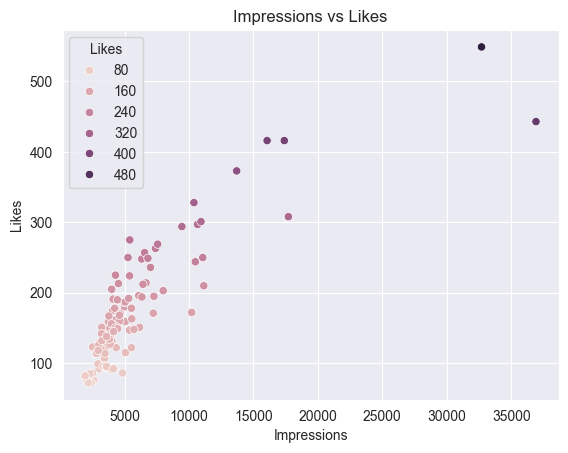

In [22]:
sns.scatterplot(x='Impressions', y='Likes', hue='Likes', data=df)
plt.title("Impressions vs Likes")
plt.show()

- as impressions increase likes increase

##### Q6: Do more profile visits translate into more follows?

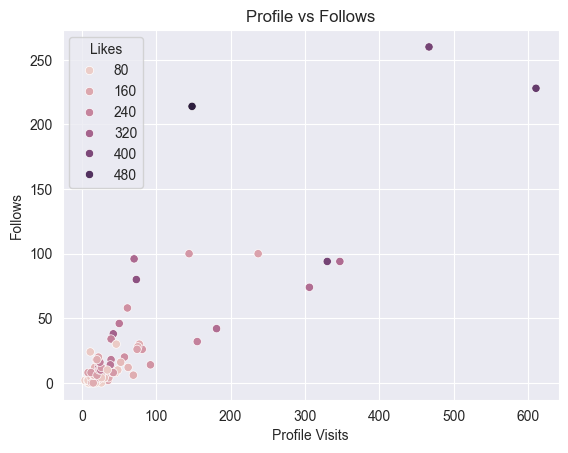

In [23]:
sns.scatterplot(x='Profile Visits', y='Follows', hue='Likes', data=df)
plt.title("Profile vs Follows")
plt.show()

In [24]:
df[['Profile Visits','Follows']].corr()

,Profile Visits,Follows
Profile Visits,1.000000,0.852748
Follows,0.852748,1.000000


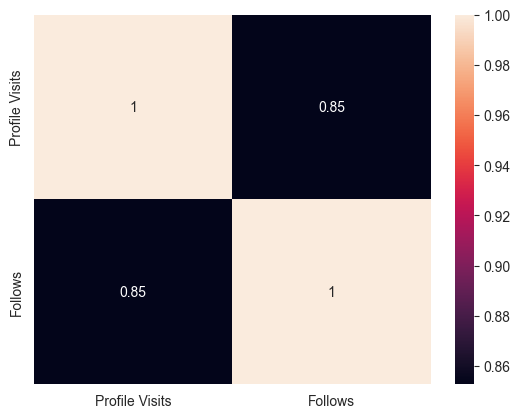

In [65]:
sns.heatmap(df[['Profile Visits','Follows']].corr(),annot = True)
plt.show()

- as profile visits increase follows increase

##### Q7: Which source (From Home, From Hashtags, From Explore, From Other) contributes the most impressions overall?

In [25]:
print(df['From Home'].sum())
print(df['From Explore'].sum())
print(df["From Hashtags"].sum())
print(df['From Other'].sum())

254685
120214
200765
18824


- Home affects impressions the most

In [26]:
df.head(1)

,Post_ID,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,...,Follows,Caption,Hashtags,Engagement_Rate,Home_ratio,Explore_ratio,Hashtag_ratio,Other_ratio,saves_to_likes,Caption_Length
0,1,3920,2586,1028,619,56,98,9,5,162,...,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,6.989796,6.596939,1.579082,2.622449,0.142857,6.049383,112


##### Q8: For each post, which source ratio is the highest?

In [27]:
df['Top_source'] = df[['Explore_ratio','Hashtag_ratio','Other_ratio','Home_ratio']].idxmax(axis = 1)

In [61]:
df['Top_source']

0         Home_ratio
1         Home_ratio
2         Home_ratio
3         Home_ratio
4         Home_ratio
           ...      
114    Explore_ratio
115    Explore_ratio
116    Hashtag_ratio
117    Explore_ratio
118    Explore_ratio
Name: Top_source, Length: 102, dtype: object

##### Q9: Do posts with higher Explore_ratio receive more like?

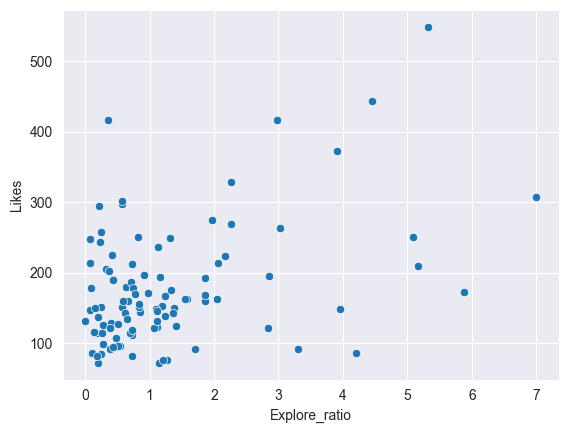

In [29]:
sns.scatterplot(data =df, x = 'Explore_ratio',y='Likes')
plt.show()

In [30]:
df[['Explore_ratio','Likes']].corr()

,Explore_ratio,Likes
Explore_ratio,1.000000,0.425912
Likes,0.425912,1.000000


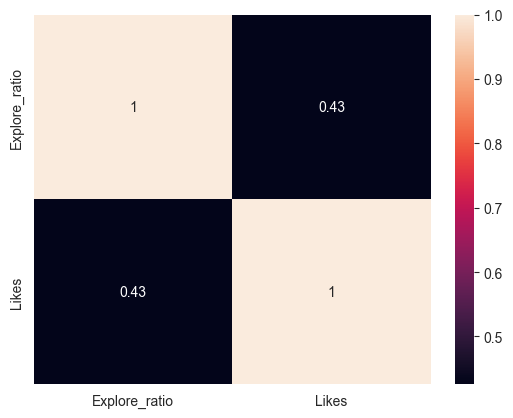

In [66]:
sns.heatmap(df[['Explore_ratio','Likes']].corr(),annot = True)
plt.show()

##### sometimes posts with higher explore_ratio gets high likes but not usually

##### Q10: Do posts with higher Hashtag_ratio perform better than those with lower?

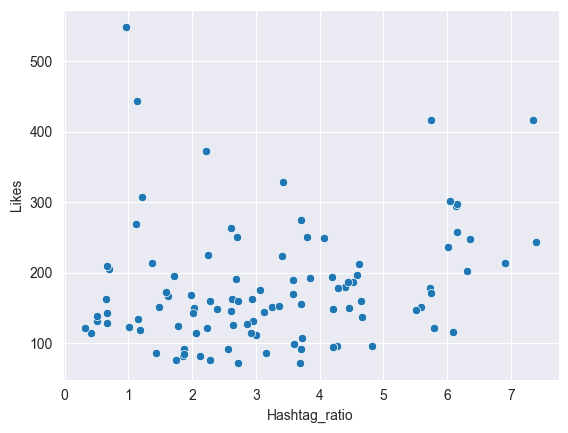

In [31]:
sns.scatterplot(data =df, x = 'Hashtag_ratio',y='Likes')
plt.show()

In [32]:
df[['Hashtag_ratio','Likes']].corr()

,Hashtag_ratio,Likes
Hashtag_ratio,1.000000,0.206919
Likes,0.206919,1.000000


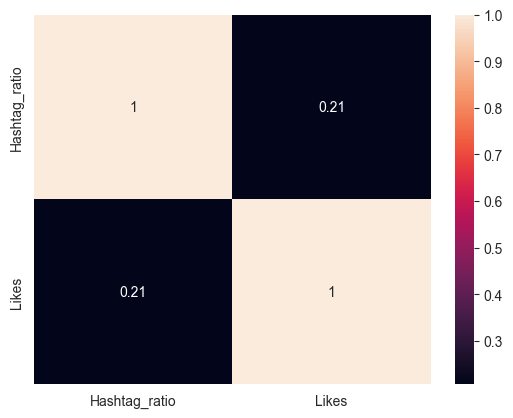

In [67]:
sns.heatmap(df[['Hashtag_ratio','Likes']].corr(),annot = True)
plt.show()

##### Likes not affected much by hashtag_ratio

##### Q11: Which posts have the highest engagement rate?

In [33]:
df.columns

Index(['Post_ID', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement_Rate', 'Home_ratio',
       'Explore_ratio', 'Hashtag_ratio', 'Other_ratio', 'saves_to_likes',
       'Caption_Length', 'Top_source'],
      dtype='object')

In [34]:
df[df['Engagement_Rate'] == df['Engagement_Rate'].max()][['Post_ID','Caption']]

,Post_ID,Caption
99,83,Here is a complete roadmap to data science tha...


##### Q12: Do posts with more saves also receive more likes?

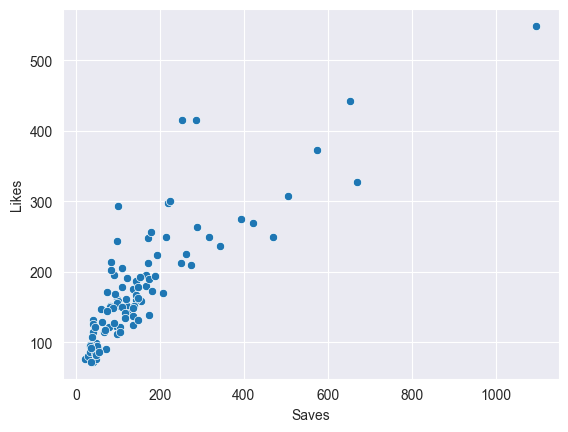

In [35]:
sns.scatterplot(data = df, x = 'Saves',y='Likes')
plt.show()

In [36]:
df[['Saves','Likes']].corr()

,Saves,Likes
Saves,1.000000,0.843395
Likes,0.843395,1.000000


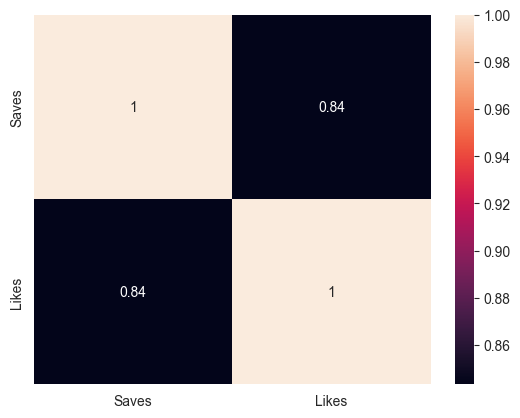

In [69]:
sns.heatmap(df[['Saves','Likes']].corr(),annot = True)
plt.show()

##### as saves increase , likes increase

In [37]:
df.columns

Index(['Post_ID', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement_Rate', 'Home_ratio',
       'Explore_ratio', 'Hashtag_ratio', 'Other_ratio', 'saves_to_likes',
       'Caption_Length', 'Top_source'],
      dtype='object')

##### Q13: What is the save-to-like ratio across posts? Which posts are most valuable?

In [43]:
x = df.sort_values("saves_to_likes", ascending = False)
x['saves_to_likes']

49     20.365854
117    19.945355
108    18.835341
109    16.363636
64     15.650558
         ...    
71      3.437500
14      3.401361
50      3.333333
2       3.129771
6       2.894737
Name: saves_to_likes, Length: 102, dtype: float64

In [46]:
df[df['saves_to_likes'] == df['saves_to_likes'].max()][['Post_ID','Caption']]

,Post_ID,Caption
49,50,Here are some of the best websites that you ca...


In [47]:
df.columns

Index(['Post_ID', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement_Rate', 'Home_ratio',
       'Explore_ratio', 'Hashtag_ratio', 'Other_ratio', 'saves_to_likes',
       'Caption_Length', 'Top_source'],
      dtype='object')

##### post wit id 50 has highest saves_to_likes ratio which means it is educational content so more people saves it


##### Q14: Do more shares lead to more profile visits and follows?

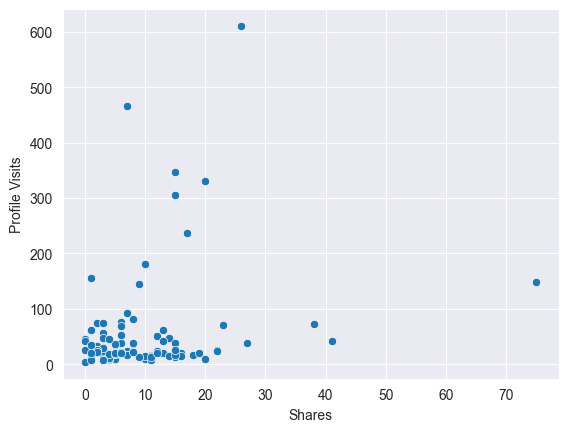

In [48]:
sns.scatterplot(data =df,x= 'Shares',y='Profile Visits')
plt.show()

In [50]:
df[['Profile Visits','Shares']].corr()

,Profile Visits,Shares
Profile Visits,1.00000,0.26546
Shares,0.26546,1.00000


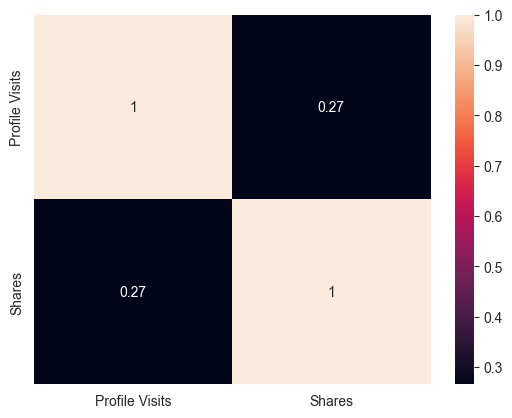

In [71]:
sns.heatmap(df[['Profile Visits','Shares']].corr(),annot = True)
plt.show()

###### Profile Visits isn't affected by Shares

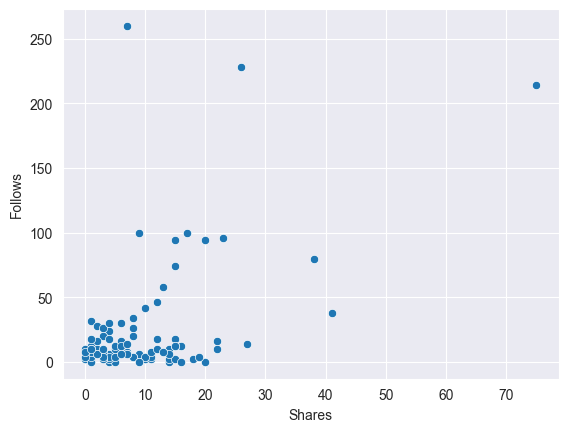

In [51]:
sns.scatterplot(data =df,x= 'Shares',y='Follows')
plt.show()

In [52]:
df[['Shares','Follows']].corr()

,Shares,Follows
Shares,1.000000,0.517278
Follows,0.517278,1.000000


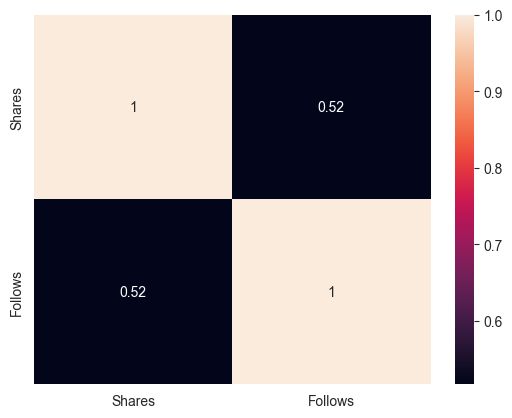

In [72]:
sns.heatmap(df[['Shares','Follows']].corr(),annot = True)
plt.show()

##### as shares increase follows increase

##### Q15: Does caption length (short vs long) affect likes?

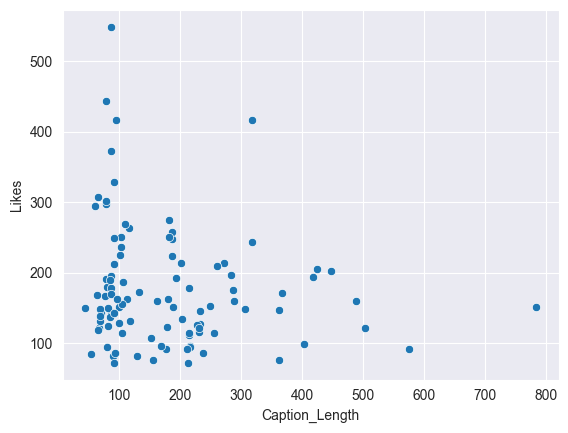

In [53]:
sns.scatterplot(data =df,x = 'Caption_Length',y='Likes')
plt.show()

In [54]:
df[['Caption_Length','Likes']].corr()

,Caption_Length,Likes
Caption_Length,1.000000,-0.157874
Likes,-0.157874,1.000000


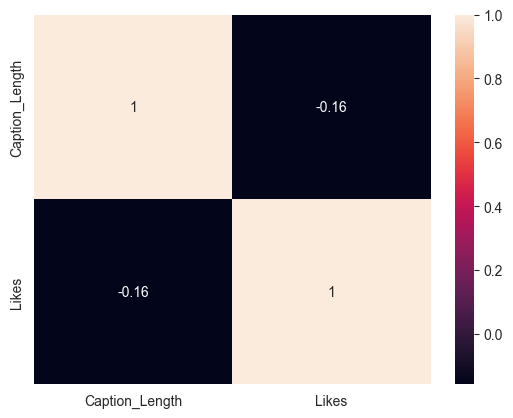

In [74]:
sns.heatmap(df[['Caption_Length','Likes']].corr(),annot = True)
plt.show()

##### there is no relation between Caption_Length , Likes

##### Q16: Does impressions affect engagement rate?

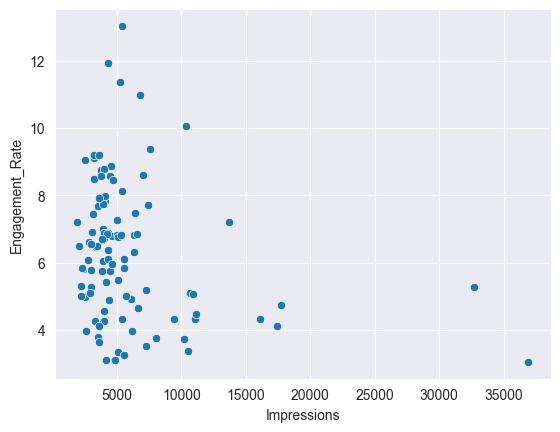

In [58]:
sns.scatterplot(data = df, x = 'Impressions',y='Engagement_Rate')
plt.show()

In [59]:
df[['Impressions','Engagement_Rate']].corr()

,Impressions,Engagement_Rate
Impressions,1.000000,-0.240337
Engagement_Rate,-0.240337,1.000000


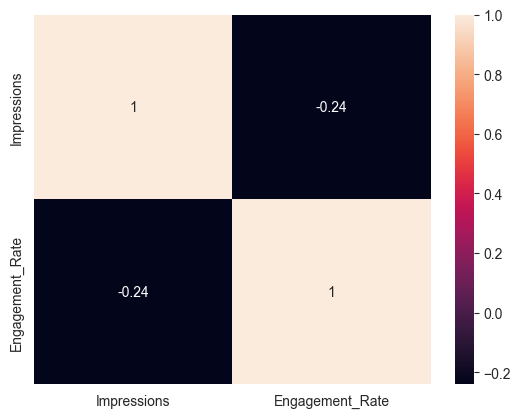

In [75]:
sns.heatmap(df[['Impressions','Engagement_Rate']].corr(),annot = True)
plt.show()

##### Impressions somehow has no relation with engagement rate

##### Q17: Can we predict likes based on impressions, saves, shares, profile visits?

In [60]:
df[['Likes','Impressions','Saves','Shares','Profile Visits']].corr()

,Likes,Impressions,Saves,Shares,Profile Visits
Likes,1.000000,0.852952,0.843395,0.718790,0.642658
Impressions,0.852952,1.000000,0.791448,0.654920,0.762679
Saves,0.843395,0.791448,1.000000,0.874004,0.377424
Shares,0.718790,0.654920,0.874004,1.000000,0.265460
Profile Visits,0.642658,0.762679,0.377424,0.265460,1.000000


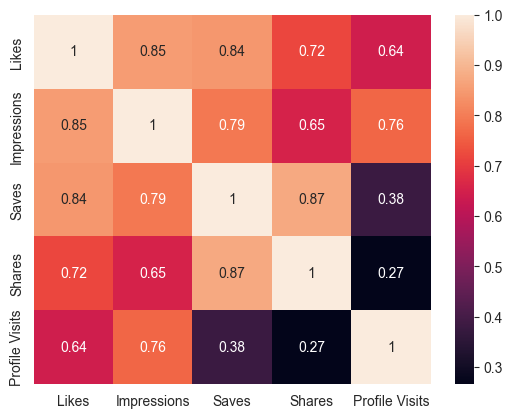

In [77]:
sns.heatmap(df[['Likes','Impressions','Saves','Shares','Profile Visits']].corr(),annot = True)
plt.show()

##### Impressions affects Likes the most

#  Conclusion

Based on the analysis of **Instagram posts**, the following insights were observed:

1. Posts with higher **impressions** usually receive more **likes**.
2. **Saves** are strongly correlated with likes, meaning valuable content tends to be saved more.
3. **Shares** do not lead to more profile visits but slightly increase follows.
4. **Caption length**  show little effect on likes.
5. **Home** is the main contributor of impressions.

---

#  Key Takeaways

- **Impressions** are the strongest predictor of likes.
- Posts with high **save-to-like ratio** are usually educational or high-value content.
- **Profile Visits → Follows** shows a strong conversion relationship.
- **Engagement Rate** is independent of impressions.
- Optimizing caption length is less critical than focusing on impressions and saves.

---

#  Recommendations

- Create content that maximizes **impressions**.
- Encourage users to **save posts** .
- Use **shares** strategically to drive new and more followers.
- Optimize for **Explore visibility** but don’t rely on it entirely.
- Focus less on caption length, more on **content quality and engagement**.
